In [1]:
#Increase width of Notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## k-Means on Old Faithful Geyser Data

### Some preparation

In [3]:
#Set Path to CSV file
data_path = 'data/faithful.csv'

#Image path for fun
img = mpimg.imread('data/old_faithful.jpg')

In [4]:
#Load CSV and remove NaN
old_faithful_data = np.genfromtxt(data_path, delimiter=',')[1:,1:]
print(old_faithful_data.shape)

(272, 2)


In [5]:
#Plotting Functions to reuse plots
def plot_old_faithful_data(old_faithful_data):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].scatter(old_faithful_data[:,0], old_faithful_data[:,1])
    ax[0].set_title('Old Faithful Eruptions')
    ax[0].set(xlabel='Eruption time (s)', ylabel='Wait time (s)')
    ax[1].imshow(img)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
def plot_old_faithful_kmeans(old_faithful_data, cluster_centers, cluster_assignment):
    fig, ax = plt.subplots(1, figsize=(5,5))
    ax.scatter(old_faithful_data[:,0], old_faithful_data[:,1],c=cluster_assignment)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1],marker='x',c='r')
    ax.set_title('Old Faithful Eruptions - k-Means')
    ax.set(xlabel='Eruption time (s)', ylabel='Wait time (s)')
 

### Plot of Old Faithful data set

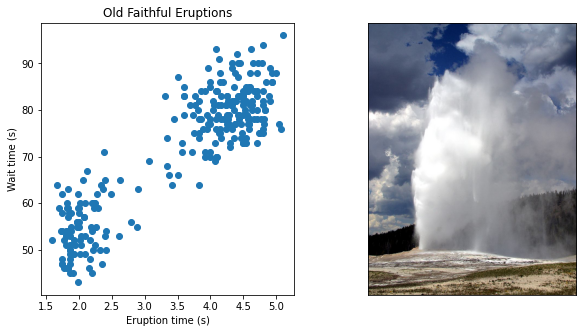

In [6]:
plot_old_faithful_data(old_faithful_data)

### k-Means

In [36]:
n_clusters=2 # Number of Clusters which you assume is optimal for data
init='random' # Initialization strategy {‘k-means++’, ‘random’}
n_init = 10 # number of time k-means will be run with different seeds
max_iter = 100 # Max number of iterations
tol=1e-4 # Tolerance (difference of centroids consecutive iterations)
random_state = None # Seed for random number generator
algorithm = 'auto' #choice of different k-Means algorithms

fitted_kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state, algorithm=algorithm, tol=tol).fit(old_faithful_data)
cluster_centers = fitted_kmeans.cluster_centers_
cluster_assignment = fitted_kmeans.predict(old_faithful_data)
print(fitted_kmeans.inertia_)

8901.768720947208


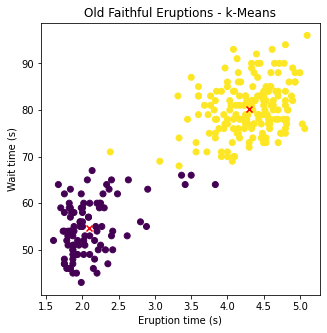

In [37]:
plot_old_faithful_kmeans(old_faithful_data, cluster_centers, cluster_assignment)

### Questions

- What happens if we change the number of clusters? 
    - Why might this be a problem in high-dimensional data?
    
    
- What happens if we change the initialization strategy?
- What happens if we change number of iterations?
- What happens if we change n_init or max_iter?
    - What is k-Means inertia?
- What happens if we fix the random state?
- Is the label of each cluster fixed? Is the color meaningful?

### k-means++
Algorithm to initialize first clusters in a smarter way (make sure that initial clusters are not random but generally further apart from each other)


### How do I find the right number of clusters?

This is generally hard and needs intuition about the data. There are some algorithms that may help though:

- Akaike Information Criterion
- Bayesian Information Criterion
- Silhouette analysis
- Elbow point (Record Sum of suared errors = Intertia)




#### Elbow point

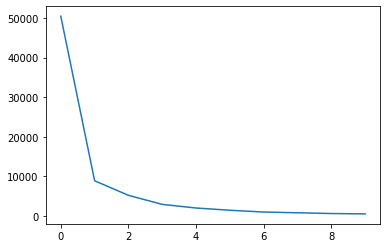

In [29]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(old_faithful_data)
    sse.append(kmeans.inertia_)

plt.plot(sse)

Start the number of clusters where the curve gets flat. Why can't we choose the highest number?

#### Silhouette Analysis

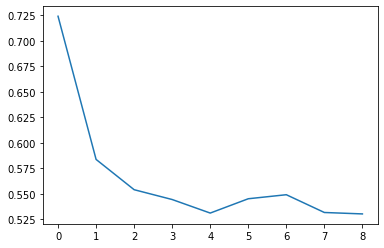

In [38]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(old_faithful_data)
    score = silhouette_score(old_faithful_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(silhouette_coefficients)

### One more important thing...

- We used the raw data. Often it is useful to scale the data or perform additional preprocessing on the raw data before using a Cluster algorithm.

- Look at `StandardScaler` or `MinMaxScaler` as a start for your projects


[scikit-learn k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)